# Hello Again 🫠

## without too much yapping ... in this notebook we will try to predict the survivors of the titanic ship using Logistic Regression 💀

<img src="https://img.ifunny.co/images/66066b3fb21c71dd09bdd55153da0a77bc4eab530d0630b2ff8e693b8a763143_1.jpg" width="400">

### Anyway let's goooooooo

## now let's load our data

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"Dataset\Titanic-Dataset.csv")

## EDA 
### let's explore the data

In [164]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Feature       | Type          | Description |
|--------------|---------------|-------------|
| PassengerId  | Numerical     | Unique ID for each passenger |
| Survived     | Binary (0/1)  | Target variable — 0 = Died, 1 = Survived |
| Pclass       | Ordinal       | Ticket class: 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower) |
| Name         | Text          | Passenger's full name  |
| Sex          | Categorical   | Gender: male or female |
| Age          | Numerical     | Age in years (some missing values) |
| SibSp        | Numerical     | # of siblings/spouses aboard the Titanic |
| Parch        | Numerical     | # of parents/children aboard the Titanic |
| Ticket       | Text          | Ticket number |
| Fare         | Numerical     | Passenger fare |
| Cabin        | Text          | Cabin number |
| Embarked     | Categorical   | Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton |

In [165]:
print(df.shape)

(891, 12)


In [166]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### okay so let's see what we got 
### Basic info from the data : 
- 891 instance 11 featrues and 1 target column to predict (Survived)
- features like Age , Embarked and Cabin have missing values
- useless features like Name , PassengerID and Ticket we might need to drop them

### Okay so let's get rid of the useless columns and continue our journey !🫣

In [168]:
df.drop(['Name','PassengerId','Ticket'] , axis=1 , inplace=True)

print(df.shape)

(891, 9)


In [169]:
# Much better now let's continue 
# let's check our Target (Survived)

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

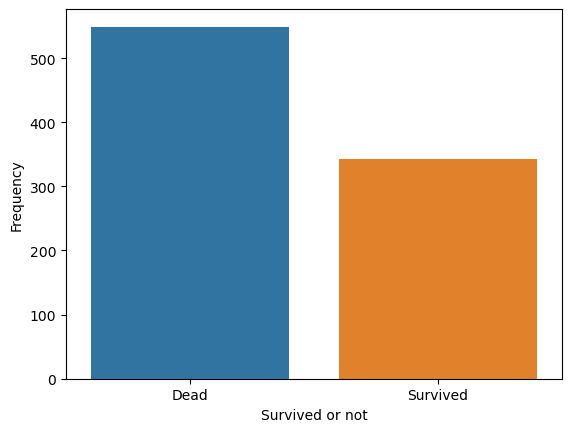

In [170]:
sns.countplot(data=df , x='Survived')
plt.xticks([0,1],labels=['Dead','Survived'])
plt.xlabel("Survived or not")
plt.ylabel("Frequency")
plt.show()

### our data is a little bit imbalanced so we need to take care of this we will discuss it later

### Let's try to look on other features !

In [171]:
cont_features = ['Age' , 'Fare']

In [172]:
def plot_dist(column , x_label, title ,y_label='frequency'):

    plt.figure(figsize=(10, 6))
    sns.histplot(column, kde=True, color='skyblue',bins=30)
    
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    mean= column.mean()
    median = column.median()
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', label=f'Median: {median:.2f}')
    
    plt.legend()
    
    plt.show()

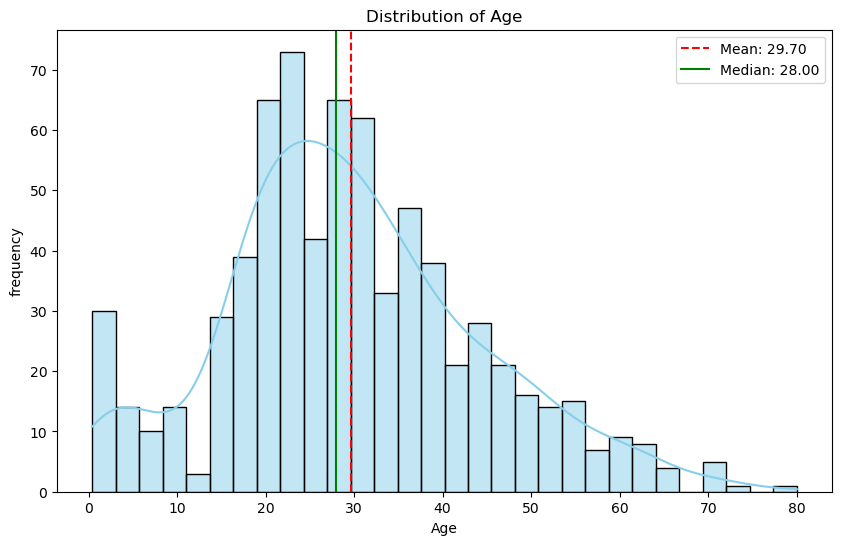

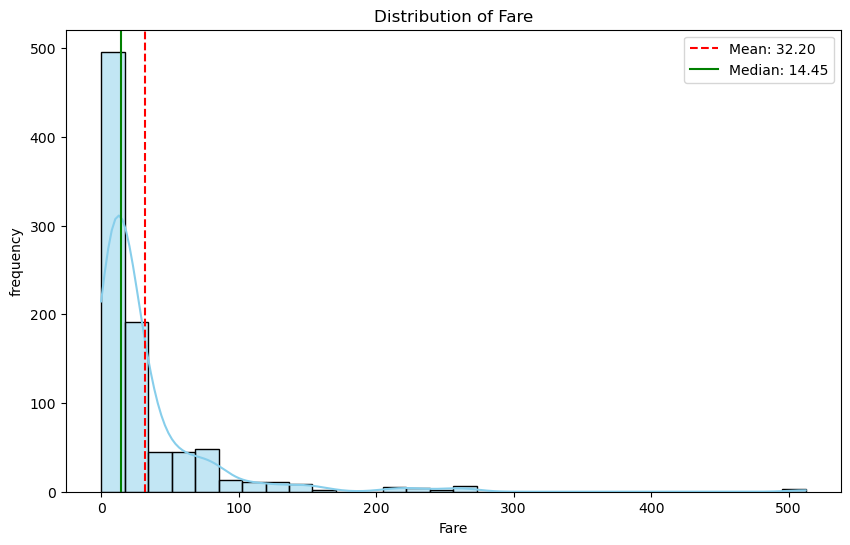

In [173]:
for i in cont_features:
    plot_dist(df[i] , i , F"Distribution of {i}")

### We can get from that Age isn't severly skewed but Fare is !

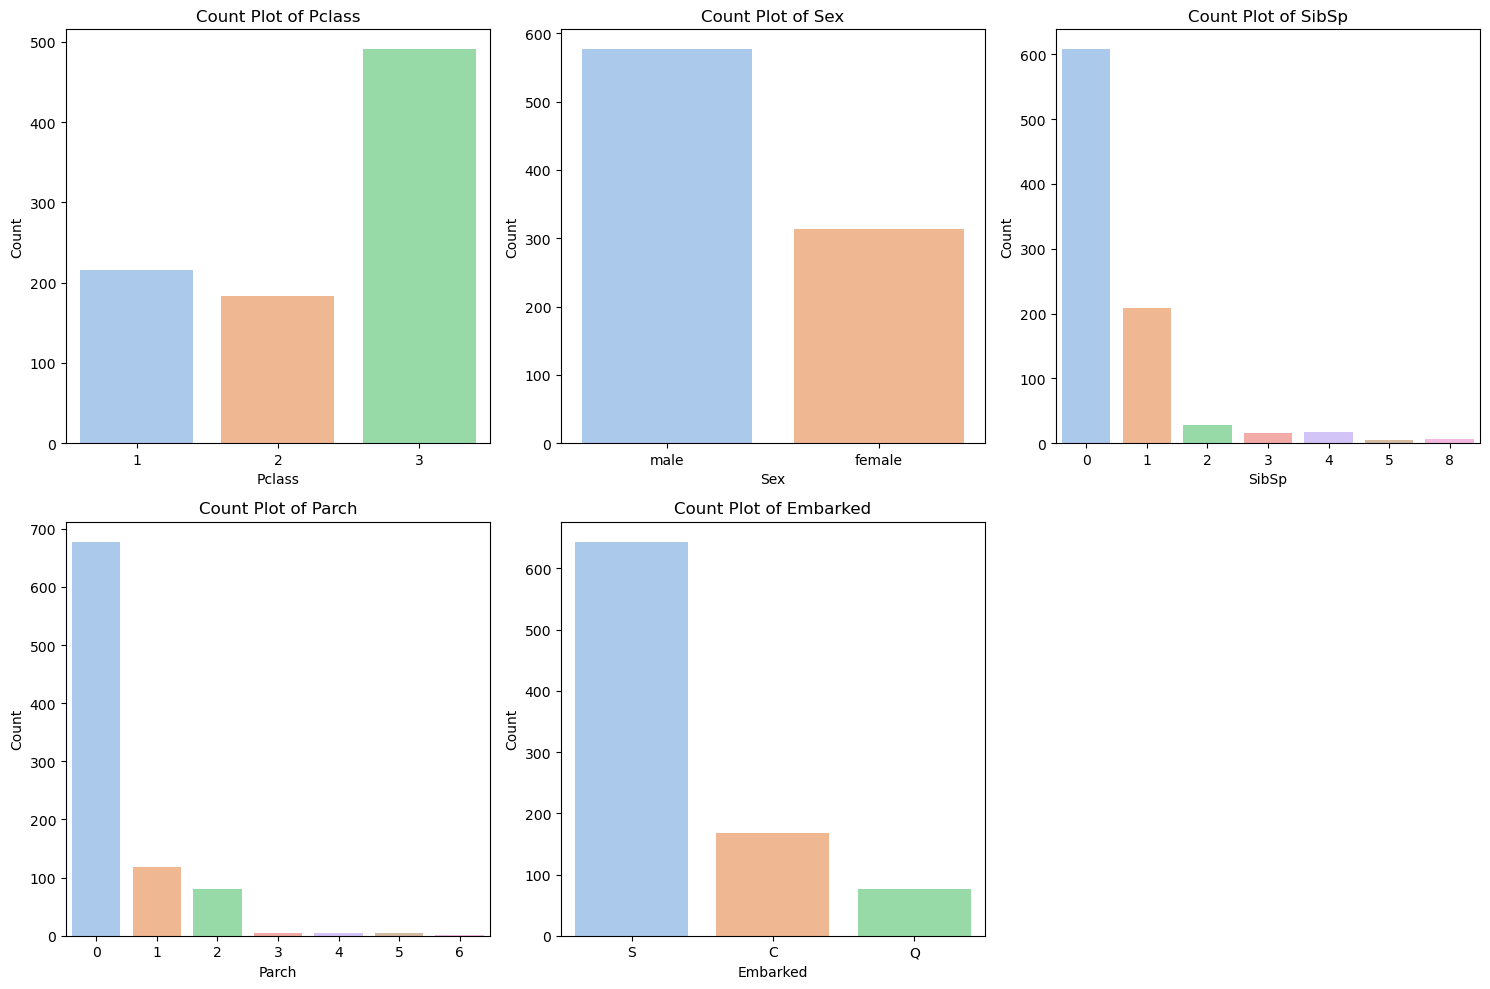

In [174]:
cat_features = ['Pclass','Sex','SibSp','Parch','Embarked']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(cat_features):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    sns.countplot(data=df, x=feature, palette='pastel')
    plt.title(f"Count Plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Data Cleaning and Feature engineering

In [175]:
# 1st let's check the missing values!

df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [176]:
# we are going to drop the Cabin feature cause it's almost completely missing

df.drop(['Cabin'] , axis=1 , inplace=True)

In [177]:
# the Age feature we can replace it with the mean or median for now let's go with the median

df['Age'].fillna(df['Age'].median() , inplace=True)

In [178]:
# we will Drop the missing Embarked Values

df.dropna(subset=['Embarked'], axis=0,inplace=True)

In [179]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [180]:
# now for the feature Engineering part ... from the description of the data we have to features that are so related we can add them together!

df['Family_members'] = df['SibSp'] + df['Parch']

df.drop(['SibSp', 'Parch'] , axis=1 , inplace=True)

print(df['Family_members'].value_counts())

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_members, dtype: int64


## Outliers

In [181]:
# Handling outliers
def remove_outlier(df , column):
    # eg : df['SalePrice']

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    upper_limit = (IQR*1.5) + Q3
    lower_limit = Q1 - (IQR*1.5)
    
    df_filtered = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df_filtered

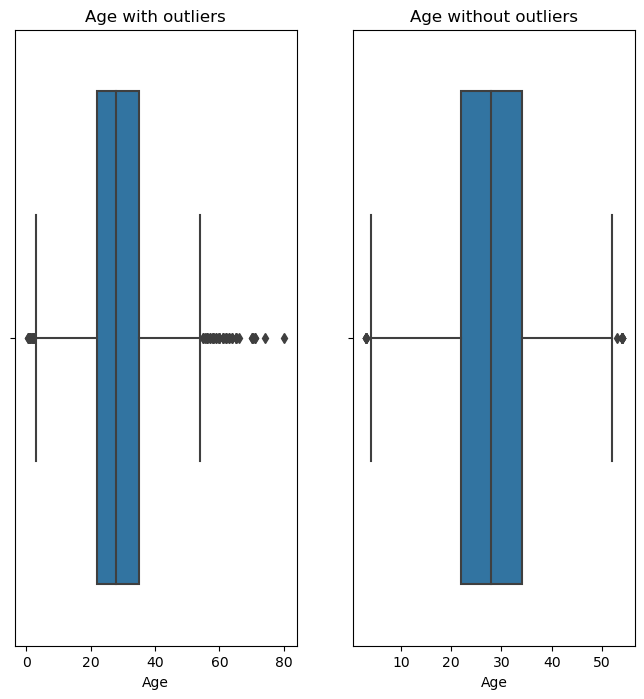

In [182]:
df_filtered = df.copy()
df_filtered = remove_outlier(df , 'Age')

fig, axes = plt.subplots(1, 2, figsize=(8, 8))

sns.boxplot(data = df , x = 'Age' , ax=axes[0])
axes[0].set_title("Age with outliers")


sns.boxplot(data = df_filtered , x = 'Age' , ax=axes[1])
axes[1].set_title("Age without outliers")

plt.show()

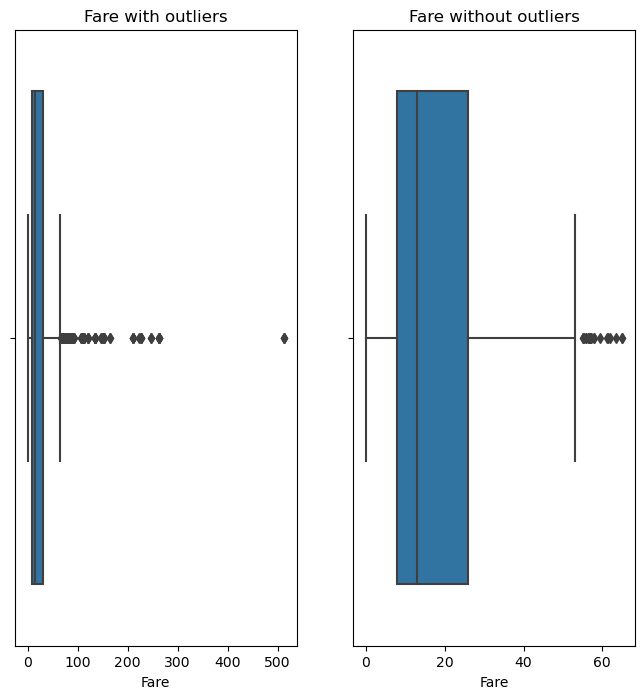

In [183]:
df_filtered = remove_outlier(df , 'Fare')

fig, axes = plt.subplots(1, 2, figsize=(8, 8))

sns.boxplot(data = df , x = 'Fare' , ax=axes[0])
axes[0].set_title("Fare with outliers")


sns.boxplot(data = df_filtered , x = 'Fare' , ax=axes[1])
axes[1].set_title("Fare without outliers")

plt.show()

## Pre-Processing

### Numerical Features :
- Age -> Standard Scaler
- Fare -> Power Transformer

### Categorical Features : 

- Sex -> Female = 0 , Male = 1
- Embarked -> One-Hot Encoding (because there's not any order to follow)
- The rest is already ordinally encoded

In [184]:
df_filtered['Sex'].replace({'male':0 , 'female':1} , inplace=True)

c:\Users\ziad\.conda\envs\TensorFlow\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [185]:
# let's 1st split the data into training and testing to prevent data leakage

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PowerTransformer , OneHotEncoder

X = df_filtered.drop(['Survived'] , axis=1)
y = df_filtered['Survived']

X_train , X_test , y_train , y_test = train_test_split(X , y , stratify=y , test_size=0.25 , random_state=42)

In [186]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((581, 6), (194, 6), (581,), (194,))

In [187]:
X_train['Embarked'].value_counts()

S    438
C     85
Q     58
Name: Embarked, dtype: int64

In [ ]:
scaler      = StandardScaler()
transformer = PowerTransformer()
encoder     = OneHotEncoder()

#scaler
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

X_train['Fare'] = transformer.fit_transform(X_train[['Fare']])
X_test['Fare'] = transformer.transform(X_test[['Fare']])

# One-hot encode using pandas
embarked_dummies = pd.get_dummies(X_train['Embarked'], prefix='Embarked')

# Concatenate with original dataframe
X_train_encoded = pd.concat([X_train, embarked_dummies], axis=1)

# Drop the original column
X_train_encoded = X_train_encoded.drop('Embarked', axis=1)


# One-hot encode using pandas
embarked_dummies_test = pd.get_dummies(X_test['Embarked'], prefix='Embarked')

# Concatenate with original dataframe
X_test_encoded = pd.concat([X_test, embarked_dummies_test], axis=1)

# Drop the original column
X_test_encoded = X_test_encoded.drop('Embarked', axis=1)


In [192]:
X_train_encoded[:1]

,Pclass,Sex,Age,Fare,Family_members,Embarked_C,Embarked_Q,Embarked_S
36,3,0,-0.04514,-0.830374,0,1,0,0


# Modeling

In [197]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [198]:
model.fit(X_train_encoded , y_train)

LogisticRegression()

In [199]:
print(f"Training Accuracy : {model.score(X_train_encoded , y_train)}")
print(f"Testing Accuracy : {model.score(X_test_encoded , y_test)}")

Training Accuracy : 0.7969018932874354
Testing Accuracy : 0.8041237113402062


In [201]:
y_pred = model.predict(X_test_encoded)

## Evaluation

In [203]:
from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(y_test, y_pred, target_names=['Dead' , 'Survived']))

              precision    recall  f1-score   support

        Dead       0.84      0.87      0.85       128
    Survived       0.73      0.68      0.70        66

    accuracy                           0.80       194
   macro avg       0.78      0.77      0.78       194
weighted avg       0.80      0.80      0.80       194



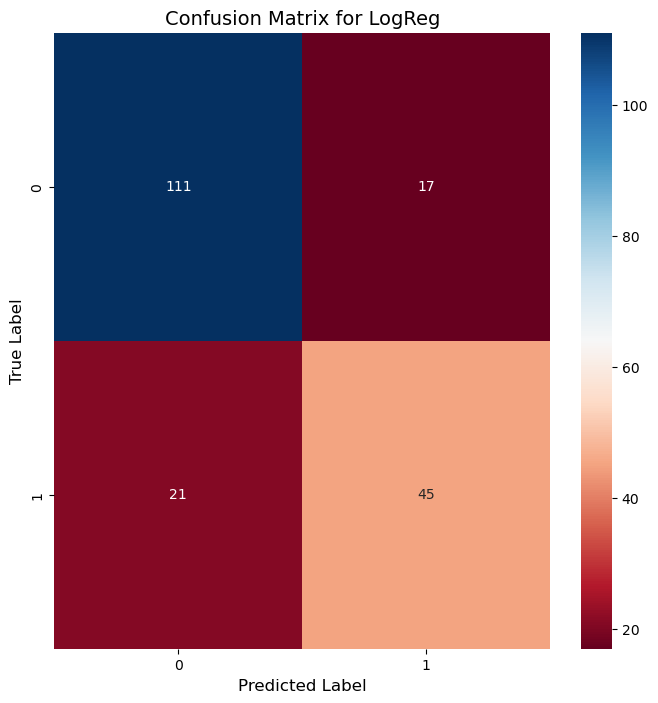

In [205]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdBu')
plt.title('Confusion Matrix for LogReg', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()